In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 4]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [3]:
from neuralprophet import NeuralProphet

In [4]:
day = 24
week = day*7
month = round(week*4.35)
year = round(month*12)
print(f'''
day = {day} hours
week = {week} hours
month = {month} hours
year = {year} hours
''')


day = 24 hours
week = 168 hours
month = 731 hours
year = 8772 hours



In [5]:
folder = Path('../../datasets/Ch15/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
df = df.resample('H').max()
df.columns = ['y']
df.ffill(inplace=True)

In [6]:
energy = df.copy()
energy.reset_index(inplace=True)
energy.columns = ['ds', 'y']

In [7]:
train = energy.iloc[:-month*2]
val = energy.iloc[-month*2:-month]
test = energy.iloc[-month:]

In [13]:
m = NeuralProphet()
metrics = m.fit(train, validation_df=val)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 55


  0%|          | 0/176 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.48E-02, min: 2.01E+00


  0%|          | 0/176 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.48E-02, min: 2.26E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.49E-02
Epoch[55/55]: 100%|█████████████████████████████████████████████████████████████████████| 55/55 [01:55<00:00,  2.10s/it, SmoothL1Loss=0.0115, MAE=1.23e+3, RMSE=1.59e+3, RegLoss=0, MAE_val=1.4e+3, RMSE_val=1.83e+3, SmoothL1Loss_val=0.0151]


In [14]:
n = len(test)+len(val)
future = m.make_future_dataframe(df=train, periods=n)
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


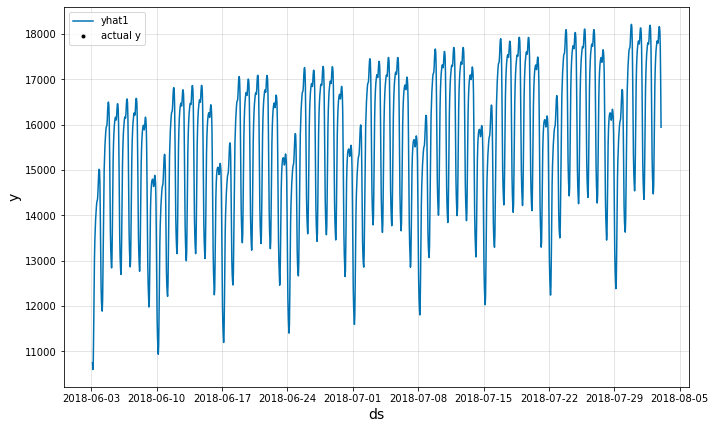

In [15]:
fig = m.plot(forecast)

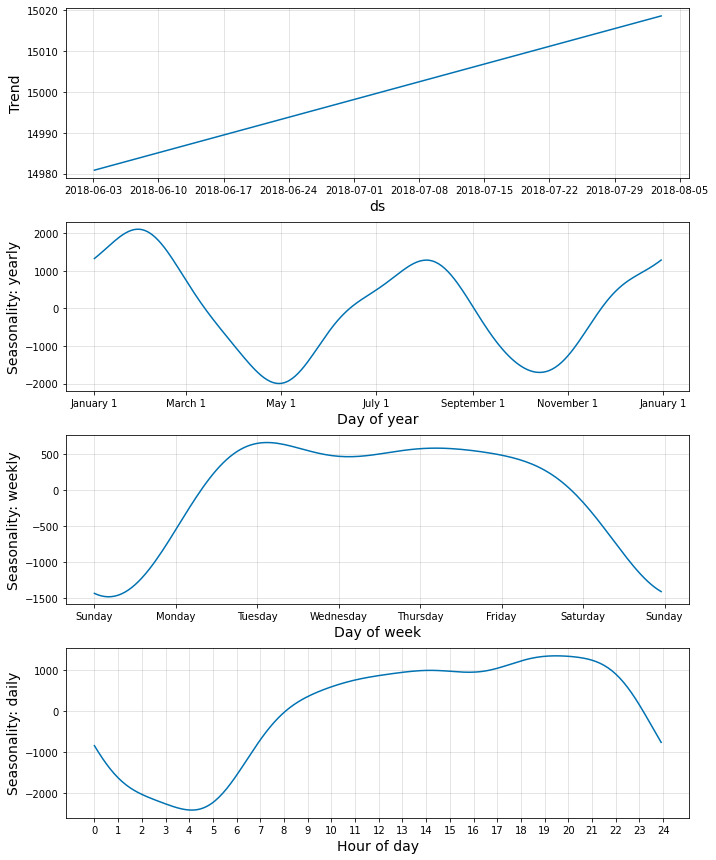

In [16]:
fig = m.plot_components(forecast)

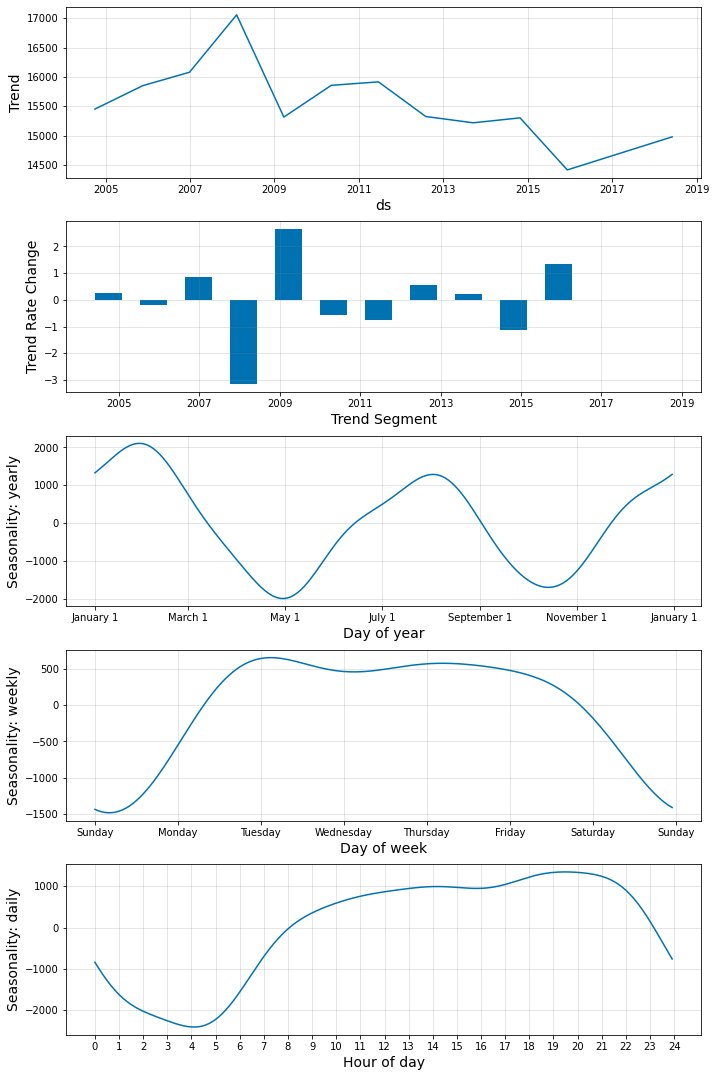

In [17]:
fig = m.plot_parameters()

In [37]:
test

,ds,y
120565,2018-07-03 14:00:00,20999.0
120566,2018-07-03 15:00:00,21321.0
120567,2018-07-03 16:00:00,21367.0
120568,2018-07-03 17:00:00,21481.0
120569,2018-07-03 18:00:00,21448.0
...,...,...
121291,2018-08-02 20:00:00,17673.0
121292,2018-08-02 21:00:00,17303.0
121293,2018-08-02 22:00:00,17001.0
121294,2018-08-02 23:00:00,15964.0


In [29]:
forecast.set_index('ds')['yhat1'].iloc[:-month]

ds
2018-06-03 03:00:00    10752.129883
2018-06-03 04:00:00    10601.103516
2018-06-03 05:00:00    10788.051758
2018-06-03 06:00:00    11462.041992
2018-06-03 07:00:00    12339.264648
                           ...     
2018-07-03 09:00:00    16523.701172
2018-07-03 10:00:00    16751.250000
2018-07-03 11:00:00    16906.335938
2018-07-03 12:00:00    17002.701172
2018-07-03 13:00:00    17070.742188
Name: yhat1, Length: 731, dtype: float64

In [56]:
prediction = forecast.set_index('ds').loc['2018-07-03 14:00:00':]['yhat1']

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

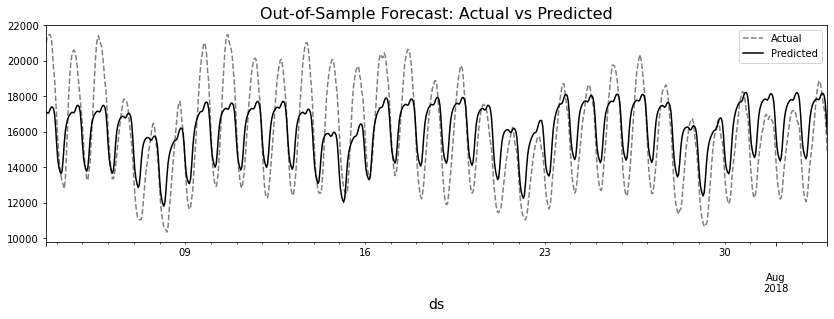

In [57]:
test.set_index('ds').plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [58]:
from statsmodels.tools.eval_measures import rmse, rmspe

In [59]:
rmspe(test['y'].values, prediction.values)

1.1729025662066894

In [60]:
rmse(test['y'].values, prediction.values)

1796.2832495706689

## There is more

In [61]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [65]:
m = NeuralProphet(learning_rate = 0.1)

train, test = m.split_df(df=energy, freq="H", valid_p=0.2)

train_results = m.fit(df=train, freq="H")
test_results = m.test(df=test)

test_results

,SmoothL1Loss,MAE,RMSE
0,0.013963,1375.211322,1707.669455


In [66]:
print(test_results)

   SmoothL1Loss          MAE         RMSE
0      0.013963  1375.211322  1707.669455


In [67]:
print(train_results)

    SmoothL1Loss          MAE         RMSE  RegLoss
0       0.146414  3801.228180  4690.570912      0.0
1       0.012529  1299.605619  1670.904376      0.0
2       0.011917  1260.741273  1629.448992      0.0
3       0.012040  1267.962080  1637.205973      0.0
4       0.012643  1304.961787  1678.390499      0.0
5       0.013475  1349.387722  1731.496511      0.0
6       0.014289  1393.585392  1783.776848      0.0
7       0.015599  1460.283304  1863.143680      0.0
8       0.016074  1483.006342  1890.838564      0.0
9       0.017667  1560.171292  1981.601101      0.0
10      0.018772  1617.680186  2042.799470      0.0
11      0.019457  1641.819249  2079.150886      0.0
12      0.020920  1704.623400  2154.606673      0.0
13      0.021666  1736.522756  2190.001509      0.0
14      0.021989  1751.762462  2208.518259      0.0
15      0.022839  1782.444228  2248.998957      0.0
16      0.022660  1773.666725  2240.359637      0.0
17      0.022920  1787.995033  2253.424781      0.0
18      0.02

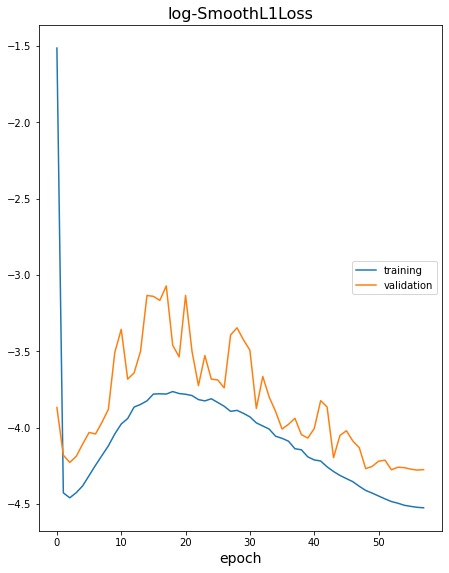

log-SmoothL1Loss
	training         	 (min:   -4.524, max:   -1.513, cur:   -4.524)
	validation       	 (min:   -4.277, max:   -3.071, cur:   -4.274)


In [69]:
m = NeuralProphet(learning_rate = 0.1)
train, test = m.split_df(df=energy, freq="H", valid_p=0.2)
metrics = m.fit(df=train, freq="H", validation_df=test, progress="plot")

In [73]:
print(metrics.tail(1))

    SmoothL1Loss          MAE         RMSE  RegLoss  SmoothL1Loss_val  \
57      0.010846  1198.940338  1553.954677      0.0          0.013929   

        MAE_val     RMSE_val  
57  1372.159271  1705.552796  
